### **Bibliotecas**

In [1]:
import pandas as pd
from scipy.stats import  f_oneway, pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns

### **``Estatística e Machine Learning - QUESTÃO 3``**

Determine:
- Hipótese nula ($H_0$)
- Hipótese alternativa ($H_a$)

Do seguinte cenário:

- Uma empresa afirma que o tempo médio de produção dos seus produtos é de menos de 4 dias.

\
Você, conta com uma amostra dessas entregas para validar estadísticamente essa afirmação.

<br>
Como quero testar se o tempo médio de produção realmente é menor que 4 dias:

$
\begin{cases}
H_0: \mu \geq 4 & \text{(Tempo médio de produção} \geq \text{4 dias)} \\
H_a: \mu < 4 & \text{(Tempo médio de produção < 4 dias)}
\end{cases}
$

<br>


---
### **``Estatística e Machine Learning - QUESTÃO 4``**

Suponha que numa escola, 4 grupos diferentes de estudantes fazem o mesmo teste de matemática com as seguintes pontuações:
- **Grupo A:** {80, 85, 88, 90, 92, 75, 78}

- **Grupo B:** {75, 78, 82, 85, 87, 93, 99}

- **Grupo C:** {20, 78, 82, 18, 30, 93, 15}

- **Grupo D:** {40, 55, 65, 75, 85, 95, 100}

\
Elabore um teste de hipótese para determinar se existe uma diferença estatisticamente significativa na distribuição das pontuações dos grupos

In [2]:
dados = {
    'A': [80, 85, 88, 90, 92, 75, 78],
    'B': [75, 78, 82, 85, 87, 93, 99],
    'C': [20, 78, 82, 18, 30, 93, 15],
    'D': [40, 55, 65, 75, 85, 95, 100]
}

# Criando o DataFrame
dataset = pd.DataFrame(dados)

# Perform ANOVA using DataFrame columns
f_statistic, p_value = f_oneway(dataset['A'], dataset['B'], dataset['C'], dataset['D'])

# Results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value = {p_value:.4f}")
if p_value < 0.05:
    print(f"\nComo {p_value:.2f} < 0.05, rejeita-se H0.\nHá uma diferença estatisticamente significante.")
else:
    print(f"\nComo {p_value:.2f} >= 0.05, aceita-se H0.\nNão há uma diferença estatisticamente significante")


F-statistic: 4.7395
P-value = 0.0098

Como 0.01 < 0.05, rejeita-se H0.
Há uma diferença estatisticamente significante.




<br>

---
### **``Estatística e Machine Learning - QUESTÃO 5``**

Qual é a relação do  "Número de aparições Zendaya em filmes por ano" e "Número de pessoas afogadas em piscinas no Brasil ao ano".

,Ano,Aparicoes_Zendaya,Afogamentos_Brasil
0,2015,4,107
1,2016,7,146
2,2017,16,178
3,2018,21,199
4,2019,26,221
5,2020,2,114
6,2021,6,133
7,2022,12,159
8,2023,16,183
9,2024,32,215


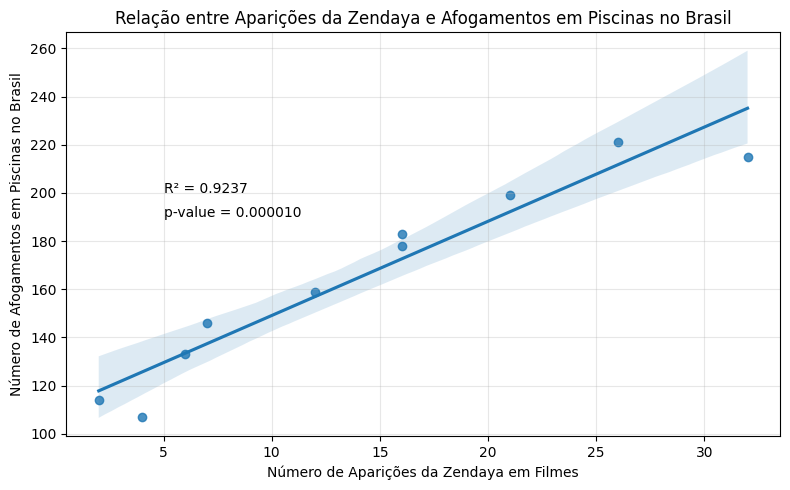

Coeficiente de correlação (r): 0.9611
R²: 0.9237
Valor-p: 0.000010


In [3]:
data = {
    'Ano': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Aparicoes_Zendaya': [4, 7, 16, 21, 26, 2, 6, 12, 16, 32],
    'Afogamentos_Brasil': [107, 146, 178, 199, 221, 114, 133, 159, 183, 215]
}

dataset_df = pd.DataFrame(data)
display(dataset_df)

plt.figure(figsize=(8, 5))
sns.regplot(x='Aparicoes_Zendaya', y='Afogamentos_Brasil', data=dataset_df)
plt.title('Relação entre Aparições da Zendaya e Afogamentos em Piscinas no Brasil')
plt.xlabel('Número de Aparições da Zendaya em Filmes')
plt.ylabel('Número de Afogamentos em Piscinas no Brasil')
plt.grid(True, alpha=0.3)

# Adicionar a equação da linha de regressão e o R²
slope, intercept, r_value, p_value, std_err = linregress(dataset_df['Aparicoes_Zendaya'], dataset_df['Afogamentos_Brasil'])
plt.text(5, 200, f'R² = {r_value**2:.4f}', fontsize=10)
plt.text(5, 190, f'p-value = {p_value:.6f}', fontsize=10)

plt.tight_layout()
plt.show()

# Calcular o teste de hipótese para verificar se a correlação é estatisticamente significativa
r, p_value = pearsonr(dataset_df['Aparicoes_Zendaya'], dataset_df['Afogamentos_Brasil'])


print(f"Coeficiente de correlação (r): {r:.4f}")
print(f"R²: {r*r:.4f}")
print(f"Valor-p: {p_value:.6f}")


Com isso temos que:

- **r = 0.9611** indica uma correlaçâo muito forte.

- **R^2=.9237** indica que 92,37% das variações no número de afogamentos são estaticamente explicadas pelo número de aparições

- **p-value = 0.000010 ($<$ 0.05)** indica que a correlação é estatisticamente significante.


Contudo, apesar de as duas variáveis apresentaram uma forte correlação, o número de aparições ``não é um bom preditor`` do número de pessoas afogadas no Brasil

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 5 - BONUS 1``**

Que acontece quando se usa Covariância para identificar a relação entre as duas variáveis?

In [4]:
covariance = dataset_df['Aparicoes_Zendaya'].cov(dataset_df['Afogamentos_Brasil'])
print(f"Covariância: {covariance:.4f}")

Covariância: 384.8889


Quando usamos a covariância para analisar a relação entre as aparições da Zendaya em filmes e os afogamentos em piscinas no Brasil, enfrentamos várias limitações importantes:

- **``Ausência de escala padronizada:``**\
A covariância não possui limites definidos, o valor 384,89 por si só não nos diz se a relação é forte ou fraca.

- **``Dependência da escala das variáveis:``**\
    Se mudássemos as unidades de medida o valor da covariância mudaria drasticamente, mesmo que a relação fundamental permanecesse idêntica.

- **``Impossibilidade de comparação:``**\
Não podemos comparar diretamente a covariância desta relação com outras relações entre variáveis diferentes.

- **``Interpretação limitada:``**\
Embora o valor positivo da covariância indique que as variáveis se movem na mesma direção, não conseguimos quantificar a força desta relação.

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 5 - BONUS 2``**

Identifique e mencione alguns possíveis confounders:

- **``Tendência temporal:``**\
Ambas as variáveis podem estar simplesmente aumentando ao longo do tempo por razões independentes.

- **``Temperatura/Sazonalidade:``**\
Anos mais quentes podem levar a maior uso de piscinas e coincidir com períodos de maior lançamento de filmes de verão.

- **``Crescimento populacional:``**\
O aumento da população brasileira pode levar a mais afogamentos e o crescimento da indústria leva a mais filmes.

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 6``**

Qual é a diferença entre amostragem estratificada e amostragem randômica ou aleatória?

- **``Amostragem Aleatória:``**\
Na amostragem aleatória, cada elemento da população tem a mesma probabilidade de ser selecionado para a amostra.\
O processo é completamente randômico, sem considerar características específicas dos elementos.

- **``Amostragem Estratificada:``**\
Na amostragem estratificada a população é dividida em subgrupos com base em características relevantes (Peso, idade, estado, país, etc.)\
A amostragem é feita realizando amostragens aleatórias dentro de cada subgrupo, produzindo uma média ponderada com menos variabilidade.

<br>

Qual você selecionaria se no seu estudo tem suspeita de confounding mas sua amostra é muito grande?

- **``Amostragem Estratificada``**
    - Garante uma melhor representação dos grupos

    - Reduz o erro amostral

    - Reduz a variância

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 7``**

Se você treina um modelo de Machine Learning (ou estadístico), como você identificaria se seu modelo tem uma alta variância (overfitting) ou um alto viés (bias, ou underfitting).

Caso seu modelo apresenta alta variância, como você resolveria esse problema?

<br>

Para identificar se um modelo de Machine Learning apresenta alta variância (overfitting) ou alto viés (underfitting), é necessário analisar seu comportamento nos conjuntos de treinamento e teste.

### **Identificação de Problemas no Modelo**

#### **Alta Variância (Overfitting)**

Um modelo com alta variância (overfitting) apresenta as seguintes características:

- Desempenho excelente nos dados de treinamento, mas significativamente pior nos dados de teste

- Captura ruídos e particularidades dos dados de treinamento que não generalizam

- Apresenta alta complexidade e se ajusta excessivamente aos dados de treinamento


#### **Soluções para Alto Viés (Underfitting)**

Um modelo com alto viés (underfitting) apresenta:

- Desempenho ruim tanto nos dados de treinamento quanto nos de teste

- Incapacidade de capturar a estrutura subjacente dos dados

- Simplificação excessiva do problema, resultando em baixa capacidade preditiva


### **Soluções para Alta Variância (Overfitting)**

Para resolver problemas de alta variância, pode-se aplicar as seguintes técnicas:

- **Regularização:** Adicionar penalidades aos parâmetros do modelo para reduzir sua complexidade, como L1 (Lasso) ou L2 (Ridge)

- **Aumento do conjunto de dados:** Obter mais dados de treinamento para melhorar a generalização do modelo

- **Redução da complexidade do modelo:** Diminuir o número de parâmetros, camadas ou profundidade do modelo

- **Técnicas de ensemble:** Combinar múltiplos modelos para reduzir a variância, como Random Forest ou bagging

- **Dropout:** Em redes neurais, desativar aleatoriamente neurônios durante o treinamento para evitar codependências

- **Early stopping:** Interromper o treinamento quando o desempenho no conjunto de validação começar a piorar

- **Validação cruzada:** Utilizar técnicas como k-fold para avaliar melhor a capacidade de generalização do modelo

- **Poda de árvores:** Em modelos baseados em árvores, limitar a profundidade ou o número de nós terminais

<br>

A escolha da técnica mais adequada dependerá do tipo específico de modelo e do contexto do problema sendo resolvido.

A combinação de várias dessas abordagens frequentemente produz os melhores resultados para combater o overfitting.